<a href="https://colab.research.google.com/github/icequeenwand/machine-learning/blob/main/supervised_learning/linear_regression/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notation
Here is a summary of some of the notation you will encounter.  

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                      ||
| **Regression** |         |    |     |
|  $\mathbf{x}$ | Training Example feature values (in this lab - Size (1000 sqft))  | `x_train` |   
|  $\mathbf{y}$  | Training Example  targets (in this lab Price (1000s of dollars))  | `y_train`
|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `x_i`, `y_i`|
| m | Number of training examples | `m`|
|  $w$  |  parameter: weight                                 | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` |

## Tools
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data

In [106]:
import numpy as np
import math, copy
import matplotlib.pyplot as plt

This wil use some dataset to train the model:

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.5               | 300                      |
| 1.7               | 350                      |
| 1.8               | 400                      |
| 2.0               | 450                      |
| 1.2               | 500                      |


In [3]:
x_train = np.array([1.5, 1.7, 1.8, 2.0, 2.2])
y_train = np.array([300.0, 350., 400.0, 450.0, 500.0])
print(f'x: {x_train}')
print(f'y: {y_train}')

x: [1.5 1.7 1.8 2.  2.2]
y: [300. 350. 400. 450. 500.]


### Number of training examples `m`
You will use `m` to denote the number of training examples. Numpy arrays have a `.shape` parameter. `x_train.shape` returns a python tuple with an entry for each dimension. `x_train.shape[0]` is the length of the array and number of examples as shown below.

In [8]:
m = len(x_train)

### Training example `x_i, y_i`

You will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example. Since Python is zero indexed, (x$^{(0)}$, y$^{(0)}$) is (1.0, 300.0) and (x$^{(1)}$, y$^{(1)}$) is (2.0, 500.0).

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.
Run the next code block below to get the $i^{th}$ training example.

In [14]:
i = 0

x_i = x_train[i]
y_i = y_train[i]

print(f'x[{i}], y[{i}]: ({x_i}, {y_i})')

x[0], y[0]: (1.5, 300.0)


In [21]:
for i in range(m):
  print(f'x[{i}], y[{i}]: ({x_train[i]}, {y_train[i]})')

x[0], y[0]: (1.5, 300.0)
x[1], y[1]: (1.7, 350.0)
x[2], y[2]: (1.8, 400.0)
x[3], y[3]: (2.0, 450.0)
x[4], y[4]: (2.2, 500.0)


### Plotting the data
You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below.
- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display

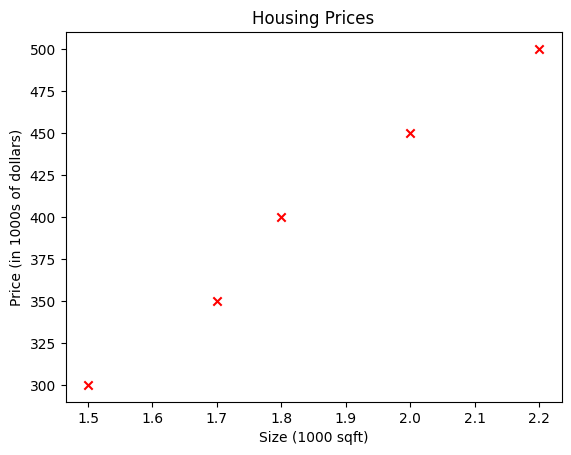

In [16]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Housing Prices")
plt.ylabel("Price (in 1000s of dollars)")
plt.xlabel("Size (1000 sqft)")
plt.show()

## Model function
 The model function for linear regression (which is a function that maps from `x` to `y`) is represented as

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/> <br/>

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$.

In [109]:
w = 258
b = -75

print(f'w: {w}, b: {b}')

w: 258, b: -75


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as -

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries

In [86]:
def compute_model_output(x, w, b):
  m = len(x)
  f_wb = np.zeros(m)
  for i in range(m):
    f_wb[i] = w * x[i] + b

  return f_wb

Now let's call the `compute_model_output` function and plot the output..

In [110]:
temp_f_wb = compute_model_output(x_train, w, b)

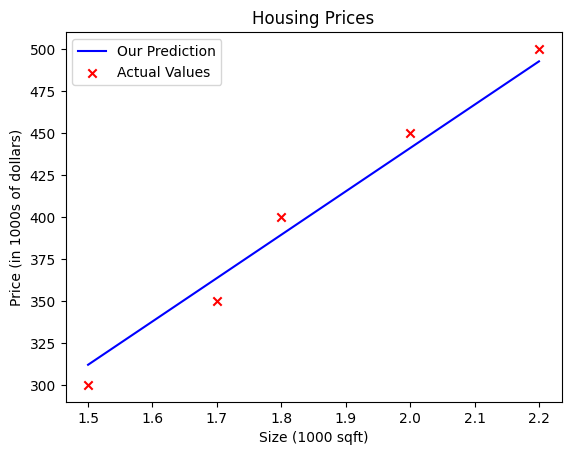

In [111]:
# Plot our model prediction
plt.plot(x_train, temp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

In [113]:
w = 258
b = -75
x_i = 1.9

predict = w * x_i + b
print(f"for a while, the price is ${predict:.0f} thousand dollars")

for a while, the price is $415 thousand dollars


## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

where
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.

The code below calculates cost by looping over each example. In each loop:
- `f_wb`, a prediction is calculated
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [101]:
def compute_cost(x, y, w, b):
    m = len(x)

    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

Calculate the cost with call the function

In [102]:
cost = compute_cost(x_train, y_train, w, b)
print(f'cost: {cost}')

cost: 386.79999999999967


## Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions.
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (code from previous lab)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.

<a name="toc_40291_2.3"></a>
### compute_gradient
<a name='ex-01'></a>
`compute_gradient`  implements (4) and (5) above and returns $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$. The embedded comments describe the operations.

In [104]:
def compute_gradient(x, y, w, b):
    m = len(x)
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

prev_gradient = compute_gradient(x_train, y_train, w, b)
print(prev_gradient)

(-4.279999999999978, 1.2000000000000113)


In [107]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history #return w and J,w history for graphing

In [108]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.54e+04  dj_dw: -7.530e+02, dj_db: -4.000e+02   w:  7.530e+00, b: 4.00000e+00
Iteration 1000: Cost 3.60e+02  dj_dw: -1.404e+00, dj_db:  2.617e+00   w:  1.846e+02, b: 6.29447e+01
Iteration 2000: Cost 2.83e+02  dj_dw: -1.230e+00, dj_db:  2.294e+00   w:  1.978e+02, b: 3.84234e+01
Iteration 3000: Cost 2.23e+02  dj_dw: -1.078e+00, dj_db:  2.011e+00   w:  2.093e+02, b: 1.69304e+01
Iteration 4000: Cost 1.77e+02  dj_dw: -9.453e-01, dj_db:  1.763e+00   w:  2.194e+02, b:-1.90840e+00
Iteration 5000: Cost 1.42e+02  dj_dw: -8.285e-01, dj_db:  1.545e+00   w:  2.282e+02, b:-1.84207e+01
Iteration 6000: Cost 1.15e+02  dj_dw: -7.262e-01, dj_db:  1.354e+00   w:  2.360e+02, b:-3.28937e+01
Iteration 7000: Cost 9.45e+01  dj_dw: -6.365e-01, dj_db:  1.187e+00   w:  2.428e+02, b:-4.55795e+01
Iteration 8000: Cost 7.85e+01  dj_dw: -5.579e-01, dj_db:  1.040e+00   w:  2.488e+02, b:-5.66986e+01
Iteration 9000: Cost 6.63e+01  dj_dw: -4.890e-01, dj_db:  9.118e-01   w:  2.540e+02, b:-6.64445e+01


### Predictions
Now that you have discovered the optimal values for the parameters $w$ and $b$, you can now use the model to predict housing values based on our learned parameters. As expected, the predicted values are nearly the same as the training values for the same housing. Further, the value not in the prediction is in line with the expected value.

In [115]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 183.6 Thousand dollars
1200 sqft house prediction 235.3 Thousand dollars
2000 sqft house prediction 442.2 Thousand dollars
